In [10]:
# The code is a test for random forest classification, last edited in 2023/10/27 by Wan

# importing necessary packages
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [11]:
# Creating dataset for training, only uses small amount of proton data
datadir = 'D:/LHAASO_KM2A/LHAASO/Data/Simulation/Xishui/'
#npzfiles = glob.glob(datadir + 'rec.all.Proton.*.npz')
npzfiles = [datadir+'rec.all.Proton.1.e12_1.e13.0_40.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e13_1.e14.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+ 'rec.all.Proton.1.e14_1.e15.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e15_1.e16.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e16_1.e17.70_75.QGSII_flukacern.root.weighted.npz']
for i, npzfile in enumerate(npzfiles):
    if i==0:
        test = np.load(npzfile, allow_pickle=True)
        arr1 = test['E']
        arr2 = test['NhitE']
        arr3 = test['NhitM']
        arr4 = arr2/arr3
        arr5 = np.zeros(len(arr1))
    else:
        f = np.load(npzfile, allow_pickle=True)
        ene = f['E']
        ED = f['NhitE']
        MD = f['NhitM']
        EMr = ED/MD
        lab1 = np.zeros(len(ene))
        arr1 = np.append(arr1, ene)
        arr2 = np.append(arr2,ED)
        arr3 = np.append(arr3,MD)
        arr4 = np.append(arr4, EMr)
        arr5 = np.append(arr5, lab1)
X_p = np.column_stack((arr1,arr2,arr3,arr4,arr5))


In [12]:
# Creating dataset for training, only uses small amount of Fe data
datadir = 'D:/LHAASO_KM2A/LHAASO/Data/Simulation/Xishui/'
#npzfiles = glob.glob(datadir + 'rec.all.Fe.*.npz')
npzfiles = [datadir+'rec.all.Fe.1.e13_1.e14.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e14_1.e15.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e15_1.e16.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e16_1.e17.70_75.QGSII_flukacern.root.weighted.npz']
for i, npzfile in enumerate(npzfiles):
    if i==0:
        test = np.load(npzfile, allow_pickle=True)
        b1 = test['E']
        b2 = test['NhitE']
        b3 = test['NhitM']
        b4 = b2/b3
        b5 = 1 + np.zeros(len(b1))
    else:
        f = np.load(npzfile, allow_pickle=True)
        eneb = f['E']
        EDb = f['NhitE']
        MDb = f['NhitM']
        EMrb = EDb/MDb
        lab1b = 1 + np.zeros(len(eneb))
        b1 = np.append(b1, eneb)
        b2 = np.append(b2,EDb)
        b3 = np.append(b3,MDb)
        b4 = np.append(b4, EMrb)
        b5 = np.append(b5, lab1b)
X_f = np.column_stack((b1,b2,b3,b4,b5))

In [13]:
# Produce the final dataset for training, and shuffling is necessary. X_A is the total set of features and Y_A is the total set of labels
X_A = np.row_stack((X_p, X_f))
np.random.shuffle(X_A)
Y_A= X_A[:,4:].flatten()
X_A = X_A[:,1:4]

ACCURACY OF THE MODEL:  0.9306688385983284
Confusion Matrix: [[377528  12733]
 [ 23019 102390]]


(0.0, 1.0, 0.0, 1.0)

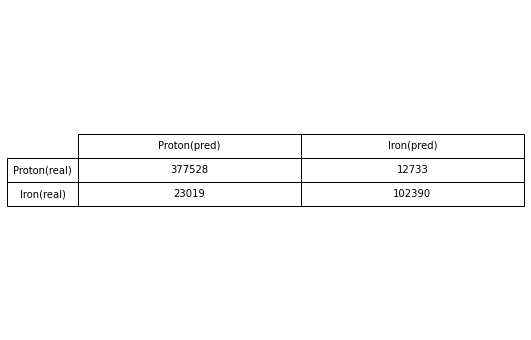

In [14]:
# Split the features and labels into a training set and a testing set, and then use random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_A, Y_A, test_size = 0.30)
numTrees = 50
clf = RandomForestClassifier( n_estimators = numTrees,  min_samples_leaf=5)
clf.fit (X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1] # y_score represents the probability for the model to classify the test data as a positive result(Fe event)


# using metrics module for accuracy calculation  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# using confusion matrix to show the results of the test
print('Confusion Matrix:', metrics.confusion_matrix(y_test, y_pred))
met = metrics.confusion_matrix(y_test,y_pred)
col=['Proton(pred)','Iron(pred)']
row = ['Proton(real)','Iron(real)']
vals = met
plt.figure(figsize = (8,6))
tab = plt.table(cellText = vals,
                colLabels = col,
                rowLabels = row,
                loc = 'center',
                cellLoc = 'center',
                rowLoc = 'center')
tab.scale(1,2)
plt.axis('off')




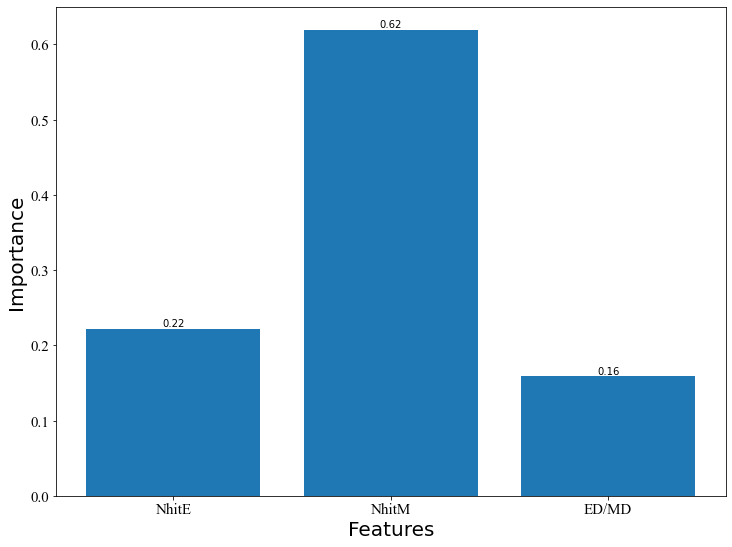

In [15]:
# To calculate the feature importance and show the result with a bar plot 
Y = clf.feature_importances_
X = ['NhitE','NhitM','ED/MD']

plt.figure(figsize=(12,9))
Ba = plt.bar(X,Y)
plt.xlabel("Features", size=20)
plt.ylabel("Importance", size=20)
plt.xticks(fontproperties='Times New Roman', size = 15)
plt.yticks(fontproperties='Times New Roman', size = 15)

# Show the values of feature importance on the bars 
for a, b in zip(X, Y):
    plt.text(a, b,'%.2f'%b, ha='center', va='bottom')
plt.show()



#feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending = False) 
#feature_imp


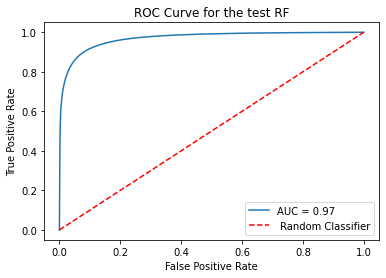

In [16]:
# Calculate the auc value, which represent the area below the ROC curve
auc_score = roc_auc_score(y_test, y_score)
auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score) 
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}') # fpr represents the false-positive rate, and tpr represents the true-positive rate
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label=' Random Classifier') # ROC curve for the random classifier, which means the model has no ability for distinguishing between the two  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')   
plt.title('ROC Curve for the test RF')             
plt.legend()                    
plt.show()              


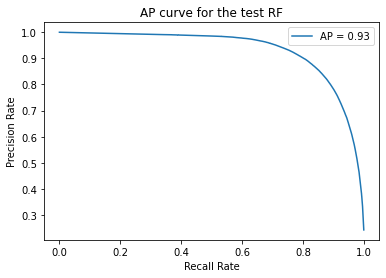

In [17]:
# This part is for PR curve. P represents precision rate (查准率) and R represents recall rate(查全率, 召回率)
# Calculate the ap value, which represents the area below ap curve
AP = average_precision_score(y_test, y_score)
AP

# Calculate the ap curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plt.plot(recall,precision,label = f'AP = {AP:.2f}')
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('AP curve for the test RF')
plt.legend()
plt.show()


In [18]:
# Save the model as a .plk file
import joblib
joblib.dump(clf, 'clf.pkl')

['clf.pkl']